<a href="https://colab.research.google.com/github/AndreyBarTF/turbines_autumn_2022-Homework/blob/Kursach12/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 style="text-align: center;">НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ</h2> 
# <h2 style="text-align: center;">МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ</h2> 
# </br>
# <h3 style="text-align: center;">Кафедра Паровых и Газовых Турбин</h3>

# </br>
# </br>
# </br>
# </br>
# </br>

# <h1 style="text-align: center;">Курсовая работа по курсу:</h1>
# <h1 style="text-align: center;">«Паровые и газовые турбины»</h1>

# </br>
# </br>
# </br>
# </br>
# </br>

# <h5 style="text-align: right;">Студент: Барбашин Андрей Алексеевич</h5>
# <h5 style="text-align: right;">Группа: ТФэ-01-20</h5>

# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>

# <h5 style="text-align: center;">Москва 2023</h5>





  Вариант №1

  $\space$ Дано:
 * Тип турбины: К-800-23,5 ЛМЗ
 * $P_0 = 25 \space МПа $ - Начальное давление
 * $t_0 = 560 ^\circ C$ -  Начальная температура
 * $P_{пп} = 3.62 \space МПа$ -  Давление промперегрева
 * $t_{пп} = 565 ^\circ C$ -  Температура промперегрева
 * $P_{к} = 3.5 \space кПа$ -  Давление в конденсаторе
 * $t_{п.в.} = 269^\circ C$ -  Температура питаталеьной воды

 * $N_{э} = 830 \space МВт$ -  Электрическая мощность
 * z = 9 -  Число отборов

1. Построение процесса расширения пара в турбине.

Определение расходов пара на входе в турбину $G_0$ и в конденсатор $G_к$.

In [1]:
!pip install iapws

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.9/111.9 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iapws: filename=iapws-1.5.3-py3-none-any.whl size=114269 sha256=81164a916085d1b537d1d9f11f6052a3fae11e8381fa50f7c6a32d13f59a360d
  Stored in directory: /root/.cache/pip/wheels/4b/8f/d7/48fbfa9f897fcad5410a5c26a04ead1dfb131026e505bff24a
Successfully built iapws


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/chast12.py /content

In [4]:
!cp /content/drive/MyDrive/compute_dop.py /content

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import iapws
from iapws import IAPWS97 as gas
import chast12
import compute_dop

In [6]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [7]:
p_0 = 25 * MPa #Начальное давление
t_0 = 560 #Начальная температура
p_middle = 3.62 * MPa #Давление промперегрева
t_middle = 565 #Температура промперегрева
p_k = 3.5 * kPa #Давление в конденсаторе
t_feed_water = 269 #Температура питательной воды
electrical_power = 830 * (10 ** 6) #Электричесская мощность
z = 9 #Число отборов шт.
avg_diam = 0.9# dр.с. = 0,9 - 1,1
rotation_speed = 50 #n
H_0 = 105
p_feed_water = 1.35 * p_0 #Давление питательной воды
ro = 0.1
internal_efficiency = 0.85
mechanical_efficiency = 0.994
generator_efficiency = 0.99

b2 = 118 # мм - принимаем это значение, поскольку значение из атласа не позволяет выполненить условие прочности для рабочих лопаток

In [8]:
chast12.get_coeff(p_0, t_0, p_middle, t_middle, p_k, t_feed_water, electrical_power, p_feed_water, internal_efficiency, mechanical_efficiency,generator_efficiency)

Значение по оси абсцисс для расчета кси 0.6972895391608839


0.6972895391608839

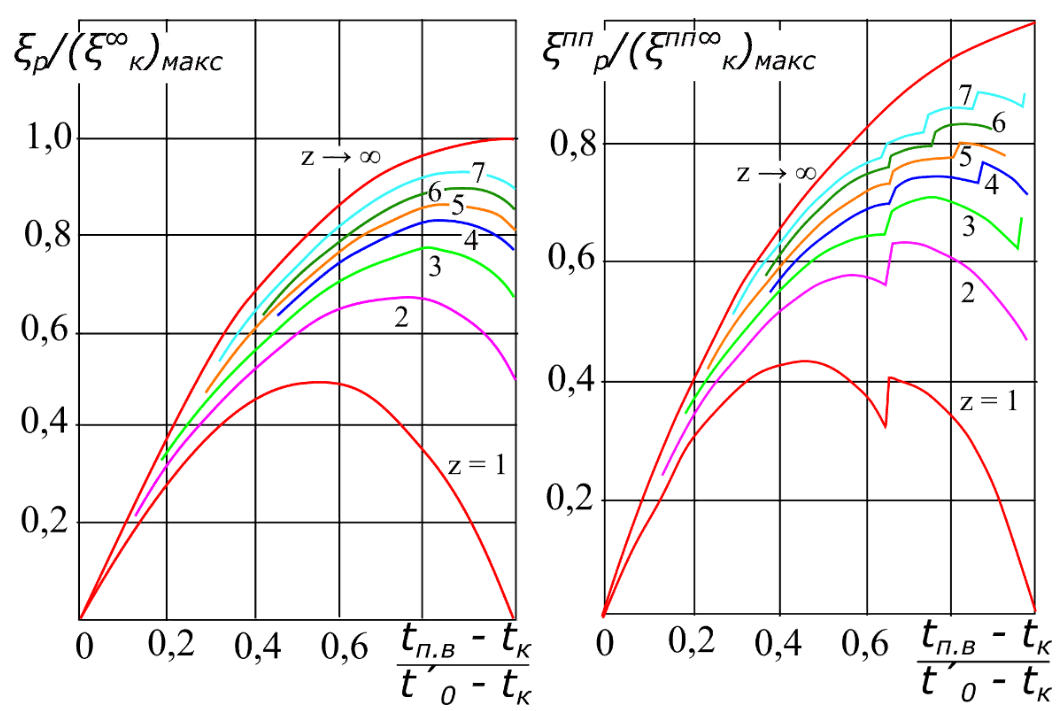


In [9]:
coef = chast12.coeff()

Зная значение по оси абсцисс (ось x), определите значение по оси ординат (ось y), с учетом заданного количества подогревателей (z)
Введите коэффициент с графика 0.91


In [10]:
G_0 = chast12.get_inlet_mass_flow(p_0, t_0, p_middle, t_middle, p_k, t_feed_water, electrical_power, p_feed_water, internal_efficiency, mechanical_efficiency, generator_efficiency)
G_k = chast12.get_condenser_mass_flow(p_0, t_0, p_middle, t_middle, p_k, t_feed_water, electrical_power, p_feed_water, internal_efficiency, mechanical_efficiency, generator_efficiency)

print("Массовый расход в турбину на входе", G_0)
print("Массовый расход в конденсатор:", G_k)

Зная значение по оси абсцисс (ось x), определите значение по оси ординат (ось y), с учетом заданного количества подогревателей (z)
Введите коэффициент с графика 0.91
Зная значение по оси абсцисс (ось x), определите значение по оси ординат (ось y), с учетом заданного количества подогревателей (z)
Введите коэффициент с графика 0.91
Массовый расход в турбину на входе 638.9600679191188
Массовый расход в конденсатор: 423.53443370021046


In [11]:
_point_0, point_0, point_1t, hp_heat_drop, point_1, _point_middle, point_middle, lp_heat_drop, point_2, point_2t, point_k_water, point_feed_water = chast12.get_points(p_0, t_0, p_middle, t_middle, p_k, p_feed_water, t_feed_water, internal_efficiency)

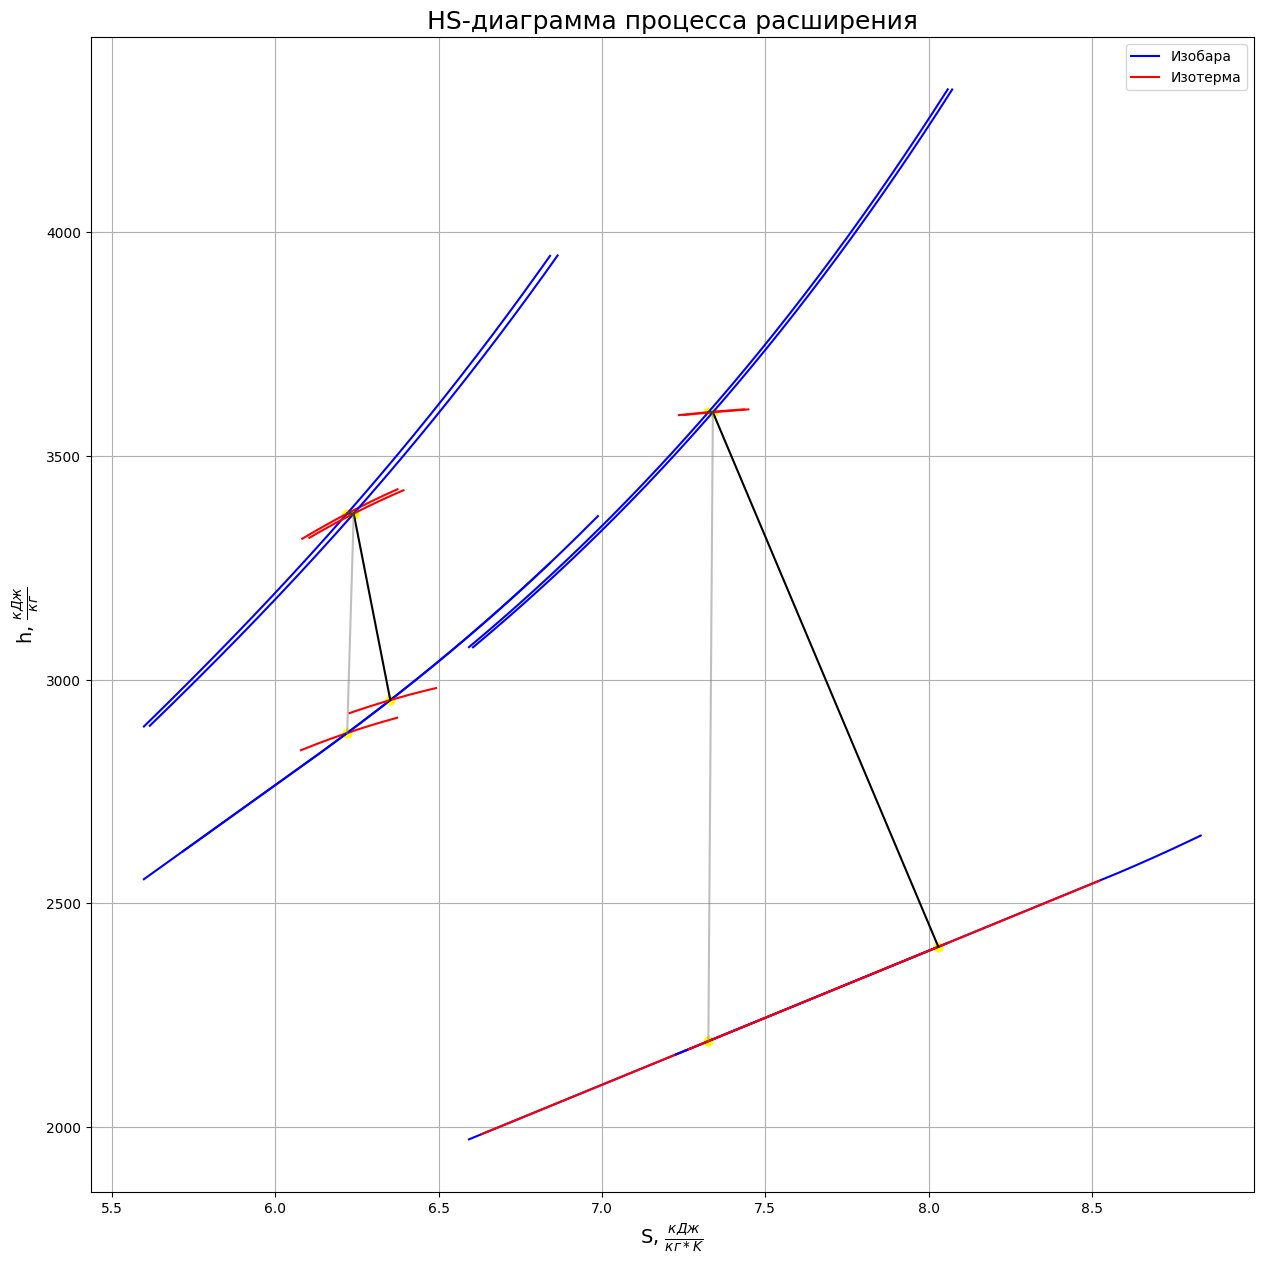

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

chast12.plot_hs([_point_0, point_0, point_1t, point_1], ax = ax)
chast12.plot_hs([_point_middle, point_middle, point_2t, point_2], ax = ax)
chast12.plot_process([_point_0, point_0, point_1], ax = ax, color='black')
chast12.plot_process([_point_middle, point_middle, point_2], ax = ax, color='black')
chast12.plot_process([_point_0, point_0, point_1t], ax=ax, alpha=0.5, color='grey')
chast12.plot_process([_point_middle, point_middle, point_2t], ax=ax, alpha=0.5, color='grey')
ax.grid()

# 2. Проведение расчета регулирующей ступени и определение зависимости ηол от U/cф. Диапазон варьируемого параметра для дан в задании. Обоснованно выбрать вариант исполнения регулирующей ступени для проектирования ЦВДв рамках заданного диапазона.


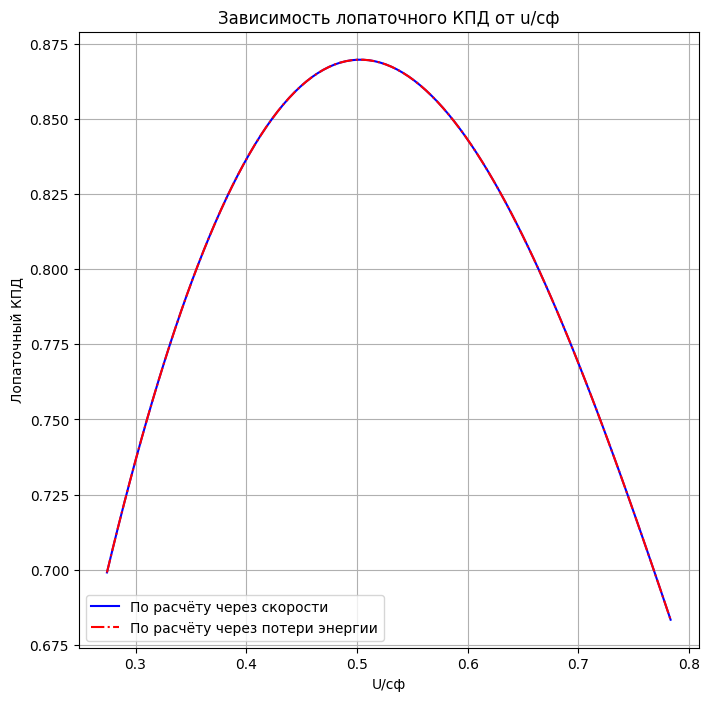

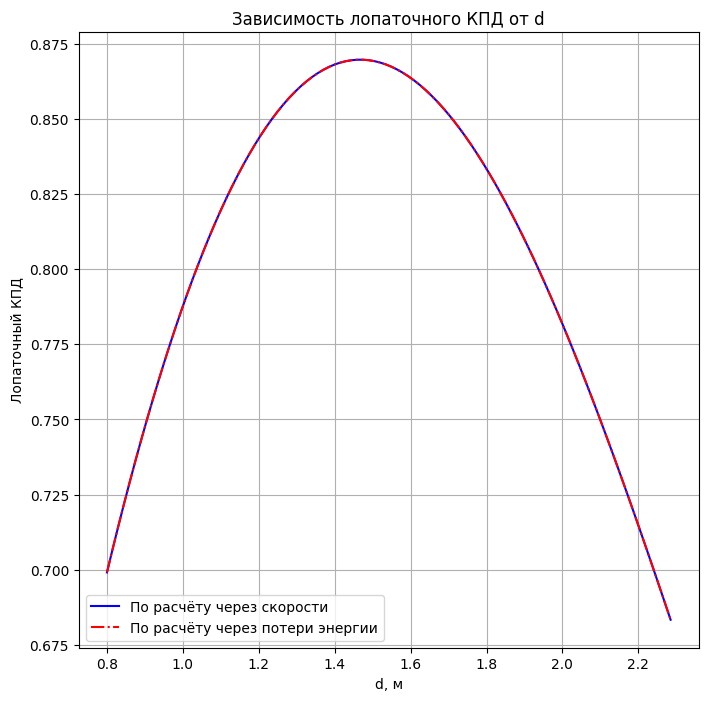

In [12]:
chast12.efficiency_graph_from_U_cf_and_avg_diameter(G_0, H_0, ro, point_0, rotation_speed)

Из графика видно, что для заданного диапазона диаметров от 0,9 до 1,1 КПД по обоим спопосбам расчета полностью сходится.

По графикам видно, что оптимальное значение u/сф составляет около 0,5, а по диаметру - 1,45 м.

Исходя из заданного диапазона оптимальным значением диаметра будет 1,1 м.


In [12]:
avg_diameter = 1.1

Окончательные параметры регулирующей ступени для оптимального диаметра

,,,,,,,
Name,Теплоперепад в сопловой решётке,Теплоперепад в рабочей решётке,Теоретическая энтальпия пара за сопловой решёткой,Теоретическая абсолютная скорость на выходе из...,Скорость звука на выходе из сопловой решётки,Число Маха на выходе из сопловой решётки,Предварительная площадь выхода потока из сопло...
Parameters,Ho_c,Ho_p,h1t,c1t,a1t,M1t,F1_
Value,94.5,10.5,3276.793152,434.741302,652.66035,0.666107,0.026208


,,,,,,,,
Name,Угол выхода потока из решётки,Угол входа потока в решётку,Диапазон для,Число Маха предварительное,Хорда сопловой решётки,Площадь поперечного сечения сопловой решётки,Момент инерции сопловой решётки,Момент сопротивления сопловой решётки
Parameters,alpha1_e,alpha0,t_opt,M1t_,b1,f1,I1_min,W1_min
Value,15,90,"[0.7, 0.85]",0.85,100,3.3,0.36,0.45


,,,,,,,,
Name,Произведение el1,Оптимальное значение степени парциальности,Высота сопловых лопаток,Уточняем коэффициент расхода сопловой решетки,Выходная площадь сопловой решетки,Количество лопаток в сопловой решетке (предвар...,Оптимальный относительный шаг,Количество лопаток в сопловой решетке
Parameters,el1,e_opt,l1,mu1,F1,z_1,t1opt,z1
Value,0.029301,0.684707,0.042794,0.970316,0.026199,32.0,0.739431,31.549035


,,,,,,,,,,
Name,Угол установки профиля решётки,Отношение: b1/l1,Коэффициент профильных потерь,Коэффициент суммарных потерь,Коэффициент концевых потерь,Коэффициент скорости сопловой решетки,Коэффициент скорости сопловой решетки (уточ),процентное отклонение fi и fi_,Скорость выхода пара из сопловой решетки,Реальный угол выхода потока из сопловой решётки
Parameters,alpha_ust,b1_l1,ksi_noz,ksi_sum,ksi_end_noz,fi,fi_,delta_fi,c_1,alpha_1
Value,38.269112,2.336766,0.0198,0.076,0.0562,0.961249,0.961306,-0.005897,417.894724,15.14486


,,,,,,,
Name,Относительная скорость на выходе из сопловой р...,Угол направления относительной скорости потока...,Теоретическая относительная скорость на выходе...,Высота рабочих лопаток,Скорость звука за рабочей решеткой (теоретичес...,Теоретическое число Маха за рабочей решёткой,Потери в сопловой решетке
Parameters,w_1,beta_1,w2t,l2,a2t,M2t,delta_Hc
Value,255.133768,25.336247,293.416495,0.046794,628.202125,0.467073,7.182


,,,,,,,
Name,Угол выхода потока из рабочей решётки по атласу,Оптимальный шаг рабочей решётки,Число Маха предварительное,Хорда рабочей решётки по атласу,Площадь поперечного сечения рабочей решётки,Момент инерции рабочей решётки,Момент сопротивления рабочей решётки
Parameters,beta2_e,t_opt,M2t_,b2_atl,f2,I2_min,W2_min
Value,22,"[0.58, 0.68]",0.9,25.95,1.85,0.205,0.324


,,,,,,,
Name,Коэффициент расхода рабочей решётки,Выходная площадь рабочей решётки,Эффективный угол выхода потока из рабочей решётки,Количество лопаток в рабочей решётке,Оптимальный шаг рабочей решётки,Угол установки рабочих лопаток,Отношение b2/l2
Parameters,mu2,F2,beta2_e,z_2,t2opt,beta2_ust,b2_l2
Value,0.939783,0.04139,21.417815,53.0,0.55,80.697815,2.521681


,,,,,,,,,,
Name,Коэффициент профильных потерь в решётке,Коэффициент суммарных потерь,Коэффициент концевых потерь,Коэффициент скорости рабочей решётки,Коэффициент скорости рабочей решётки (уточ),процентное отклонение между psi и psi_,Угол направления относительной скорости на вых...,Абсолютная скорость на выходе из рабочей решётки,Угол выхода абсолютной скорости из рабочей реш...,Действительная относительная скорость на выход...
Parameters,ksi_grid,ksi_sum_g,ksi_end_grid,psi,psi_,delta_psi,beta_2,c_2,alpha_2,w_2
Value,0.061,0.146,0.085,0.924121,0.924696,-0.06225,21.799213,127.969876,51.892634,271.152404


,,,
Name,Фиктивная скорость,Отношение скоростей,Оптимальное отношение скоростей
Parameters,cf,u_cf,u_cf_opt
Value,458.257569,0.377053,0.489027


,,,,,,
Name,Потери в рабочей решётке,Потери с выходной скоростью,Располагаемая энергия ступени,Лопаточный КПД по расчёту через потери энергии,Лопаточный КПД по расчёту через скорости,Расхождение eff и eff_
Parameters,delta_Hp,delta_Hvc,E0,eff,eff_,delta_eff
Value,6.284806,8.188145,105.0,0.793762,0.793762,-0.0


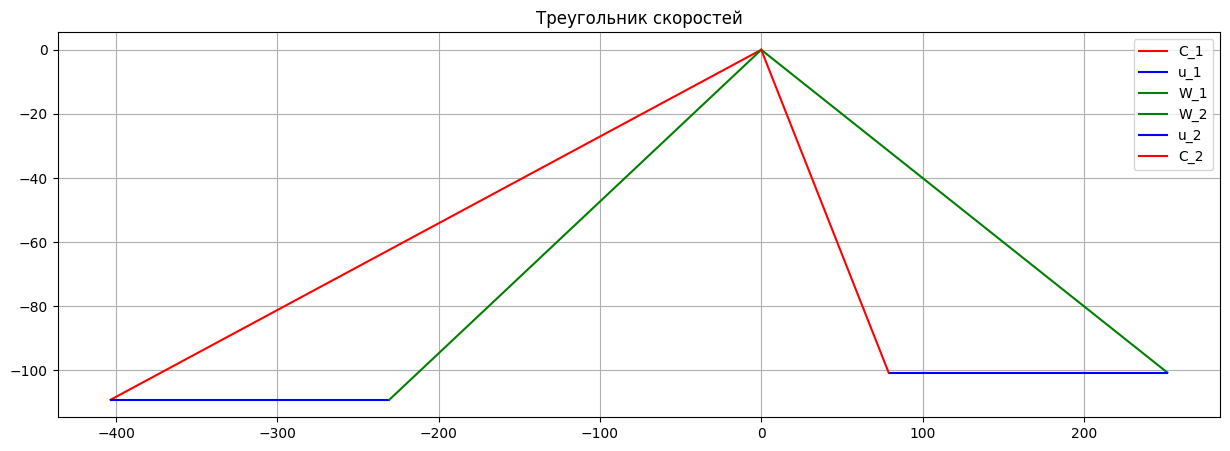

In [13]:
chast12.main(G_0, H_0, ro, point_0, rotation_speed, avg_diameter, b2)

In [14]:
point_1_t, point_1_, point_2_t, point_2_, point_t_konec = chast12.graff(G_0, H_0, ro, point_0, rotation_speed, avg_diameter, b2)

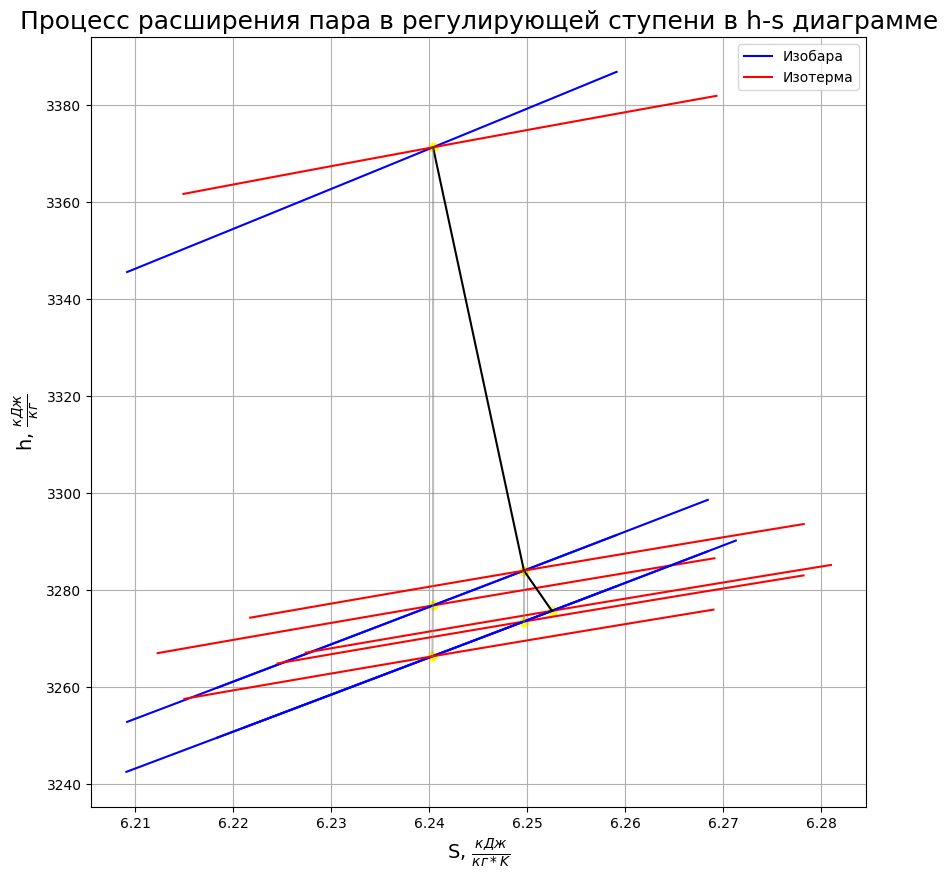

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

compute_dop.plot_hs([point_0, point_1_t, point_1_, point_2_t, point_2_, point_t_konec], ax = ax)
compute_dop.plot_process([point_0, point_1_], ax = ax, color='black')
compute_dop.plot_process([point_1_, point_2_], ax = ax, color='black')
compute_dop.plot_process([point_0, point_1_t, point_t_konec], ax=ax, alpha=0.5, color='grey')
compute_dop.plot_process([point_1_, point_2_t], ax=ax, alpha=0.5, color='grey')
ax.grid()

Расчёт внутреннего КПД регулирующей ступени и сопутствующих параметров и их вывод в удобной форме

In [15]:
chast12.main2(G_0, H_0, ro, point_0, rotation_speed, avg_diameter, b2)

,,,,,,,,,,,,
Name,Периферийный диаметр,Радиальный зазор в периферийном уплотнении,Эквивалентный зазор в уплотнении по бандажу (п...,Относительные потери от утечек через бандажные...,Абсолютные потери от утечек через периферийное...,Относительные потери от трения диска,Абсолютные потери от трения диска,Коэффициент вентиляционных потерь,Ширина рабочей решетки,Коэффициент сегментных потерь,"Относительные потери в ступени, связанные с па...",Абсолютные потери от парциальности
Parameters,peripheral_diameter,delta_r,delta_e,ksi_bandage,deltaH_y,ksi_friction,deltaH_tr,ksi_v,B2,ksi_segment,ksi_partiality,deltaH_partiality
Value,1.146794,0.001147,0.000338,0.015505,1.628053,0.001733,0.181968,0.006199,116.448247,0.062249,0.068448,7.187047


,,,
Name,Использованный теплоперепад ступени,Внутренний относительный КПД ступени,Внутренняя мощность ступени
Parameters,H_i,internal_eff,N_i
Value,74.347981,0.708076,47505.39126


Прочностные расчеты (лопатка и диск последней ступени ЦВД).

Проверка рабочих лопаток на прочность

In [16]:
chast12.endurance(G_0, H_0, ro, point_0, rotation_speed, avg_diameter, b2)

,,,,
Name,Момент сопротивления профиля рабочей лопатки,Напряжение изгиба лопатки,угловая скорость рабочего колеса,Напряжение растяжения лопатки
Parameters,W2_min_,sigma_bending,omega,sigma_stretching
Value,31.730078,6.262548,314.159265,19812941.786563


Лопатка прошла проверку на прочность, так как занчение (изгибающее напряжение) sigma_bending = 6,26 МПа меньше допускаемого [σизг] = 20 МПа
Напряжение растяжения sigma_stretching = 19,8 МПа это меньше допускаемого  [σр
] = 450 МПа

# 3. Определение числа ступеней и распределение параметров по ним.


In [17]:
real_p0,real_p1t,real_p_middle = chast12.real_point(p_0, p_middle)

Корневой диаметр =  0.8532058108799223
13.903249582271416


(0.9000000000000001,
 0.19504831671753917,
 1.0482541275974615,
 0.8532058108799223)

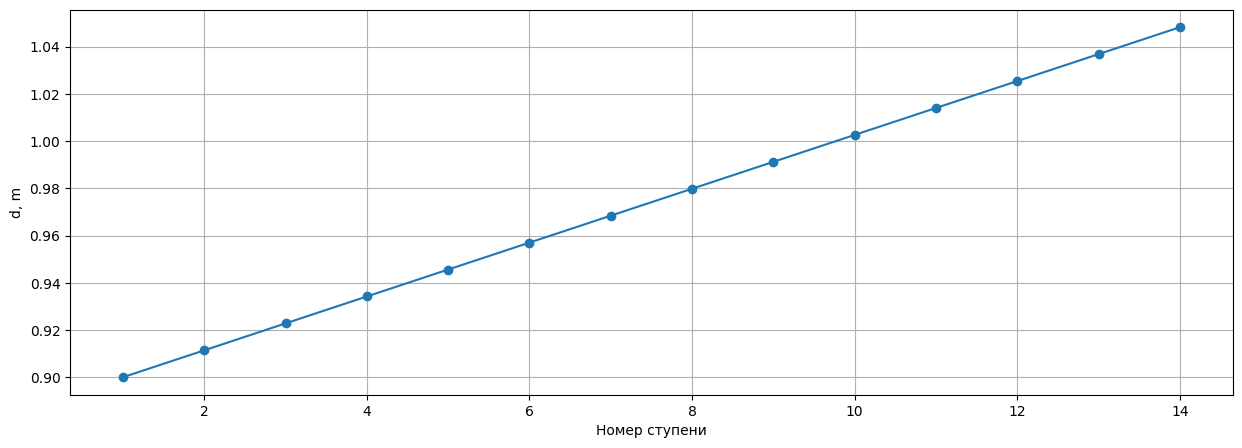

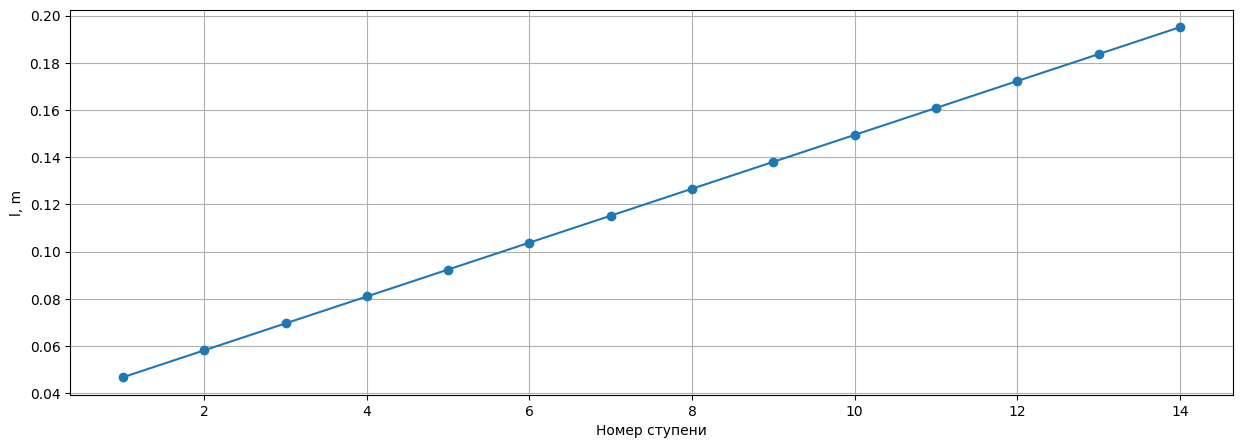

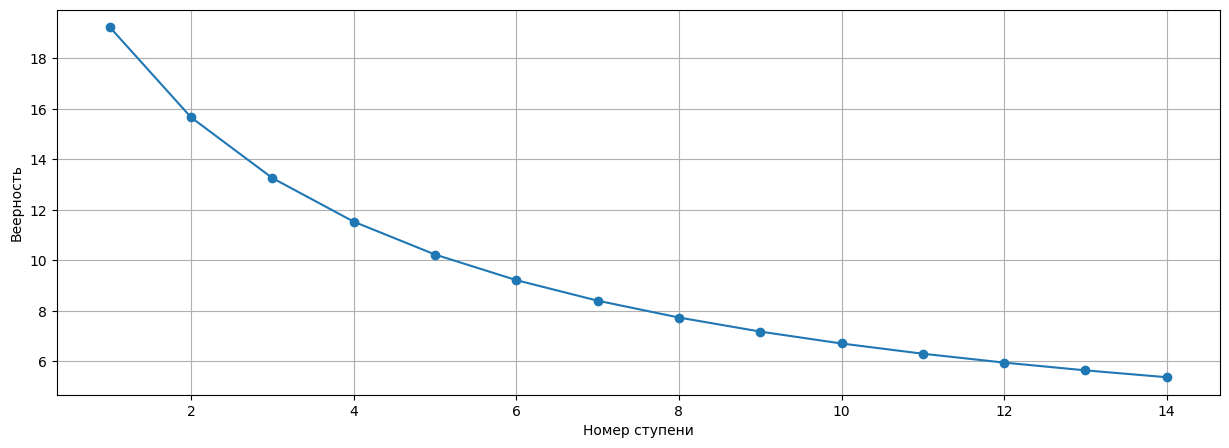

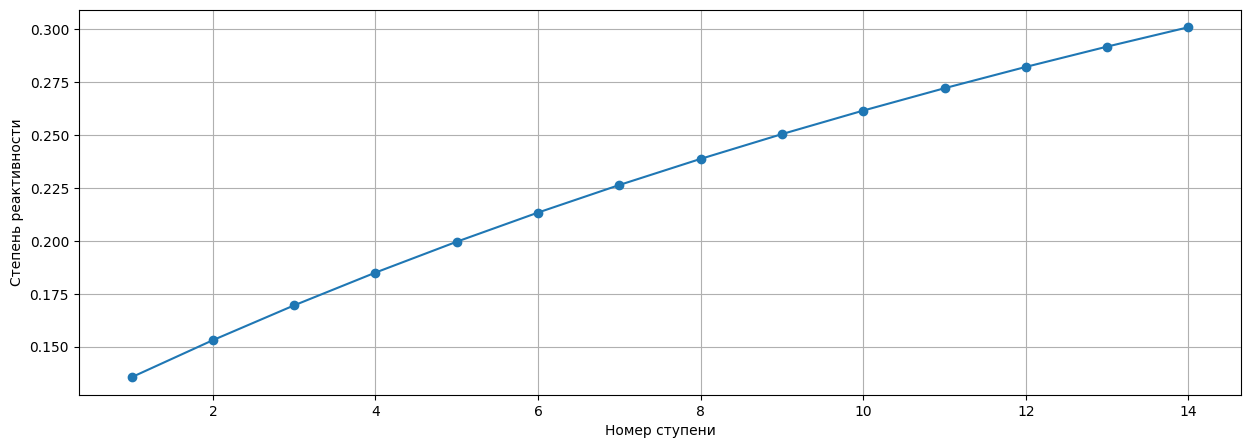

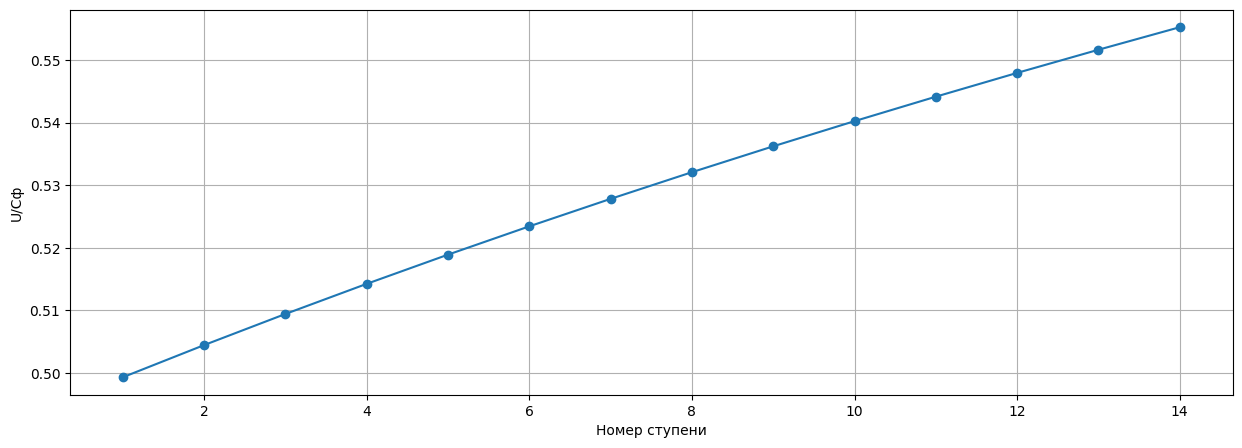

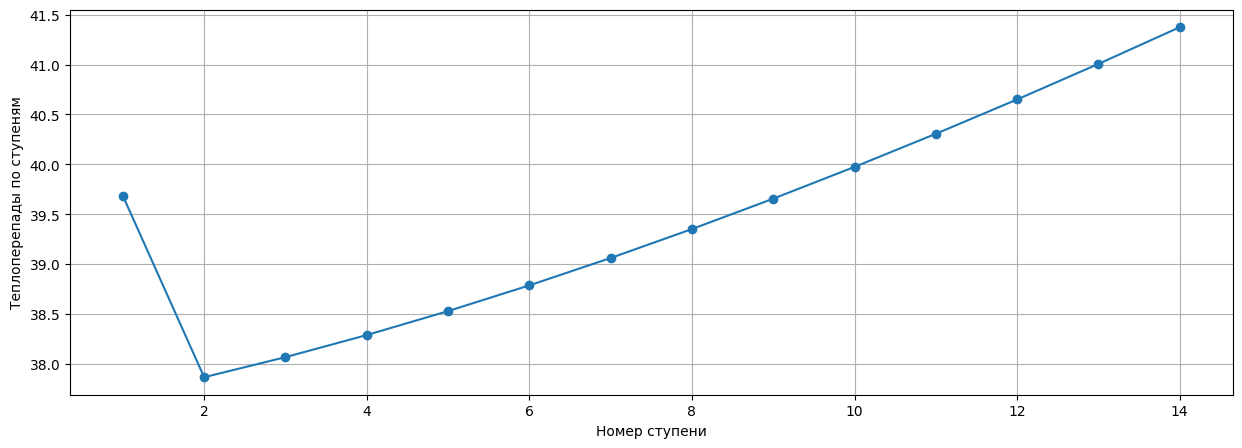

In [18]:
chast12.determination_of_the_number_of_steps(G_0, real_p0, point_0, avg_diameter, ro, rotation_speed, H_0, b2, True)

In [18]:
_point_0, point_0, point_1t, hp_heat_drop, point_1, _point_middle, point_middle, lp_heat_drop, point_2, point_2t, point_k_water, point_feed_water = chast12.get_points(p_0, t_0, p_middle, t_middle, p_k, p_feed_water, t_feed_water, internal_efficiency)

Проверка диска на прочность

In [19]:
chast12.disk_strength()

0.25
0.56
Коэффициент запаса прочности:  2.555300997787942


Оценка вибрационной надежности пакета рабочих лопаток последней ступени ЦВД по возмущающим силам I рода (с построением вибрационной диаграммы) и II рода.

Коэффициент (ось X) для отпределения пси 58.593729303440284
0.98
192.07938079400216 Гц 1440.5953559550162 Гц 1008.4167491685113 Гц
216.27432669264886 1444.0204553465685 1013.303723403669


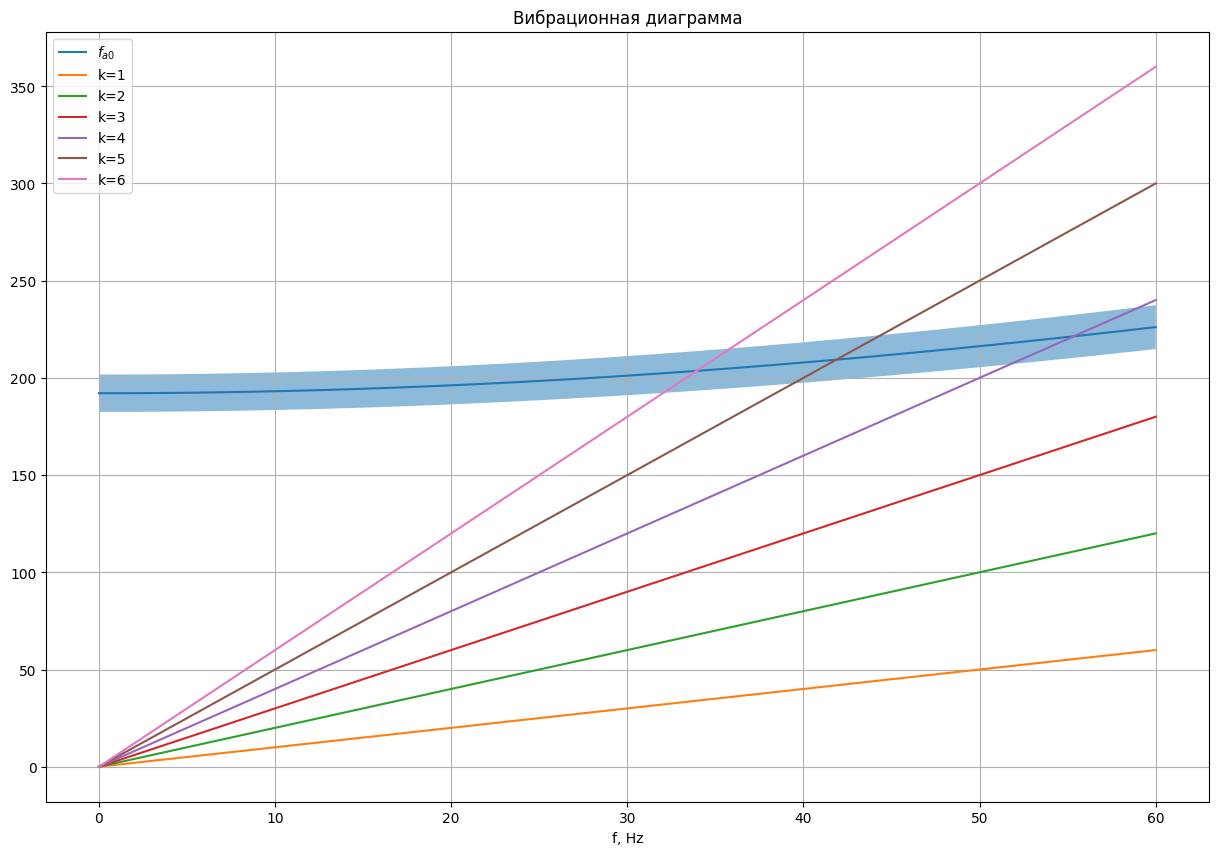

In [20]:
chast12.vibration_diagram(G_0, H_0, ro, point_0, rotation_speed, avg_diameter, b2, real_p0)

Определение критических частот вращения ротора ЦВД турбины.

In [21]:
chast12.Determination_of_critical_rotor_speeds()

Первая собственная частота вращения ротора по первому тону колебаний на абсолютно жестких опорах
241.20006153578288 rad/s
964.8002461431315 rad/s
2-e собственные частоты вращения ротора на упругих опорах
243.23413767989015 rad/s
362.4867692081358 rad/s
Первая критическая частота вращения ротора 171.2688242443103 rad/s 27.258279976019033 Гц
Первая критическая частота вращения ротора 339.32747209462565 rad/s 54.00564451073685 Гц


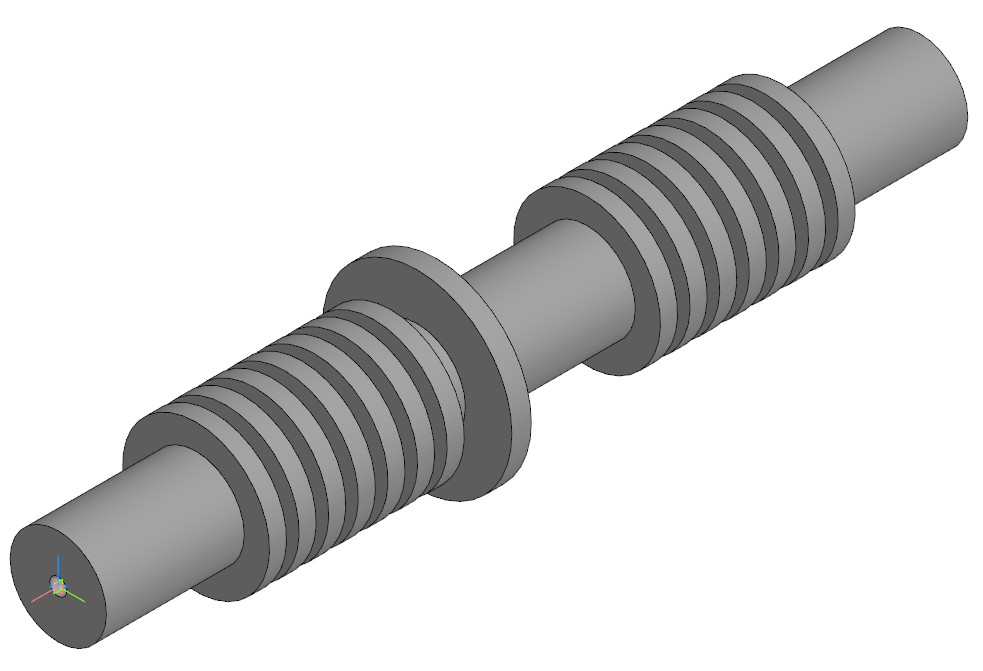